In [184]:
import pandas as pd

df = pd.read_json('departamentos.json')

df.to_csv('departamentos.csv', index=False)

In [185]:
df.info() # Visualize metadata from the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               900 non-null    object
 1   price             900 non-null    object
 2   col               900 non-null    object
 3   terreno           900 non-null    object
 4   recamaras         900 non-null    object
 5   banos             900 non-null    object
 6   estacionamientos  900 non-null    object
 7   descripcion       900 non-null    object
dtypes: object(8)
memory usage: 56.4+ KB


In [186]:
# Delete duplicated data
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574 entries, 0 to 898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               574 non-null    object
 1   price             574 non-null    object
 2   col               574 non-null    object
 3   terreno           574 non-null    object
 4   recamaras         574 non-null    object
 5   banos             574 non-null    object
 6   estacionamientos  574 non-null    object
 7   descripcion       574 non-null    object
dtypes: object(8)
memory usage: 40.4+ KB


In [187]:
# Extract the numeric portion from the 'terreno' column and store it in the new 'dimensiones' column
# (e.g. converts '625 mt^2' to '625')
df['dimensiones'] = df['terreno'].str.split().str[0]

# Delete the 'terreno' column as its useful information has already been transferred to 'dimensiones'
df = df.drop(columns=['terreno'])

In [188]:
# Display the first rows of the df to check that the 'dimensiones' column was correctly created
df.head()

,dir,price,col,recamaras,banos,estacionamientos,descripcion,dimensiones
0,Carr. México-Toluca 5804,"MN 7,500,000","Contadero, Cuajimalpa de Morelos",3 rec.,3 baños,2 estac.,"Departamento en venta en Be Grand Contadero, e...",140
1,MIER Y PESADO,"MN 9,945,880\nMN 2,400 Mantenimiento","Del Valle Norte, Benito Juárez",3 rec.,3 baños,2 estac.,El desarrollo de Mier y Pesado es un moderno c...,223
2,"Av. Baja California 149, Roma, Cuauhtémoc","MN 6,565,000","Roma, Cuauhtémoc",2 rec.,2 baños,1 estac.,¡La nueva preventa en la Col. Roma se esta ago...,67
3,CALZ. DESIERTO DE LOS LEONES 6060,"MN 10,550,000","San Bartolo Ameyalco, Alvaro Obregón",3 rec.,3 baños,3 estac.,"Departamento en venta, en la colonia San Barto...",197
4,La Loma Santa Fe,"MN 14,500,000","Santa Fe La Loma, Alvaro Obregón",3 rec.,4 baños,3 estac.,"Departamento en dos vistas, la loma sta fe. 28...",289


In [189]:
# Rename the 'price' column to 'precio'
df = df.rename(columns={'price': 'precio'})

In [190]:
# Clean the 'precio' column

# Identify rows where 'price' starts with 'MN ' or 'USD ' (valid price formats)
valid_prices = df['precio'].str.startswith('MN')

# Keep only the rows with valid price formats to ensure data consistency
df = df[valid_prices].copy()

# Remove extra information that appears after the '\n'
# as some price entries contain maintenance details
df['precio'] = df['precio'].str.split('\n').str[0]

# In this dataframe all prices are in mexican pesos, so we can skip the usd conversion
# Keep only the numeric value (price)
df['precio'] = df['precio'].str.split().str[1]

In [191]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 518 entries, 0 to 898
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               518 non-null    object
 1   precio            518 non-null    object
 2   col               518 non-null    object
 3   recamaras         518 non-null    object
 4   banos             518 non-null    object
 5   estacionamientos  518 non-null    object
 6   descripcion       518 non-null    object
 7   dimensiones       518 non-null    object
dtypes: object(8)
memory usage: 36.4+ KB


,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones
0,Carr. México-Toluca 5804,"7,500,000","Contadero, Cuajimalpa de Morelos",3 rec.,3 baños,2 estac.,"Departamento en venta en Be Grand Contadero, e...",140
1,MIER Y PESADO,"9,945,880","Del Valle Norte, Benito Juárez",3 rec.,3 baños,2 estac.,El desarrollo de Mier y Pesado es un moderno c...,223
2,"Av. Baja California 149, Roma, Cuauhtémoc","6,565,000","Roma, Cuauhtémoc",2 rec.,2 baños,1 estac.,¡La nueva preventa en la Col. Roma se esta ago...,67
3,CALZ. DESIERTO DE LOS LEONES 6060,"10,550,000","San Bartolo Ameyalco, Alvaro Obregón",3 rec.,3 baños,3 estac.,"Departamento en venta, en la colonia San Barto...",197
4,La Loma Santa Fe,"14,500,000","Santa Fe La Loma, Alvaro Obregón",3 rec.,4 baños,3 estac.,"Departamento en dos vistas, la loma sta fe. 28...",289


In [192]:
# Extract the 'alcaldia' value from the 'col' column and store it on its own column
# The final str.strip() removes any leading or trailing whitespace characters from the extracted value
df['alcaldia'] = df['col'].str.split(',').str[-1].str.strip()

# Keep only the neighborhood name in the 'col' column, since the 'alcaldía' value has been transferred
# The final str.strip() removes any leading or trailing whitespace characters from the extracted value
df['col'] = df['col'].str.split(',').str[0].str.strip()

In [193]:
df.head(10) # Verify the process worked

,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones,alcaldia
0,Carr. México-Toluca 5804,"7,500,000",Contadero,3 rec.,3 baños,2 estac.,"Departamento en venta en Be Grand Contadero, e...",140,Cuajimalpa de Morelos
1,MIER Y PESADO,"9,945,880",Del Valle Norte,3 rec.,3 baños,2 estac.,El desarrollo de Mier y Pesado es un moderno c...,223,Benito Juárez
2,"Av. Baja California 149, Roma, Cuauhtémoc","6,565,000",Roma,2 rec.,2 baños,1 estac.,¡La nueva preventa en la Col. Roma se esta ago...,67,Cuauhtémoc
3,CALZ. DESIERTO DE LOS LEONES 6060,"10,550,000",San Bartolo Ameyalco,3 rec.,3 baños,3 estac.,"Departamento en venta, en la colonia San Barto...",197,Alvaro Obregón
4,La Loma Santa Fe,"14,500,000",Santa Fe La Loma,3 rec.,4 baños,3 estac.,"Departamento en dos vistas, la loma sta fe. 28...",289,Alvaro Obregón
5,Sierra Vertientes,"11,500,000",Lomas de Chapultepec,3 rec.,3 baños,3 estac.,"Amplio departamento en venta, en una de las me...",272,Miguel Hidalgo
6,Av Paseo de la Reforma 2742,"7,400,000",Lomas de Bezares,2 rec.,2 baños,2 estac.,Departamento en Venta en Lomas de Bezares. Des...,185,Miguel Hidalgo
8,BOSQUE DE TORONJOS,"18,500,000",Bosques de las Lomas,3 rec.,3 baños,4 estac.,Tu nuevo hogar te encantará inundado de luz y ...,446,Cuajimalpa de Morelos
9,Lafragua 13,"14,500,000",Tabacalera,1 rec.,2 estac.,No disponible,Venta de Hermoso Departamento en Be Grand Refo...,125,Cuauhtémoc
10,Lago Neuchatel 79,"16,990,000",Ampliación Granada,3 rec.,2 baños,3 estac.,Este espectacular departamento cuenta con 2 re...,207,Miguel Hidalgo


In [194]:
# Define misspelled 'alcaldia' names and their corrected versions 
# This accounts for common formatting issues such as missing accents or punctuation
# (e.g. 'Gustavo A Madero' -> 'Gustavo A. Madero')
alcaldia_corrections = {
    'Alvaro Obregon': 'Álvaro Obregón',
    'Alvaro Obregón': 'Álvaro Obregón',
    'Coyoacan': 'Coyoacán',
    'Tlahuac': 'Tláhuac',
    'Magdalena Contreras': 'La Magdalena Contreras',
    'Azcapotzalco': 'Azcapotzalco',
    'Gustavo A Madero': 'Gustavo A. Madero',
    'Cuauhtemoc': 'Cuauhtémoc'
}

# Apply the correction
df['alcaldia'] = df['alcaldia'].replace(alcaldia_corrections)

In [195]:
# List of valid 'alcaldia' values
valid_alcaldias = [
    'Álvaro Obregón', 'Azcapotzalco', 'Benito Juárez', 'Coyoacán', 'Cuajimalpa de Morelos',
    'Cuauhtémoc', 'Gustavo A. Madero', 'Iztacalco', 'Iztapalapa', 'La Magdalena Contreras',
    'Miguel Hidalgo', 'Milpa Alta', 'Tláhuac', 'Tlalpan', 'Venustiano Carranza', 'Xochimilco'
]

# Check which entries in the alcaldia column aren't in this list
invalid_alcaldias = df[~df['alcaldia'].isin(valid_alcaldias)]

# See invalid 'alcaldia' values just one time no matter how many times they repeat
df.loc[~df['alcaldia'].isin(valid_alcaldias), 'alcaldia'].unique()

array(['Polanco', 'Ciudad de México'], dtype=object)

In [196]:
# Keep only the rows with valid 'alcaldia' values
df = df[df['alcaldia'].isin(valid_alcaldias)].copy()

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 898
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               491 non-null    object
 1   precio            491 non-null    object
 2   col               491 non-null    object
 3   recamaras         491 non-null    object
 4   banos             491 non-null    object
 5   estacionamientos  491 non-null    object
 6   descripcion       491 non-null    object
 7   dimensiones       491 non-null    object
 8   alcaldia          491 non-null    object
dtypes: object(9)
memory usage: 38.4+ KB


In [198]:
# Display the median apartment prices for each 'alcaldia'

# Turn the 'precio' column to float
df['precio'] = df['precio'].str.replace(',', '').str.strip() # Remove commas before conversion, as pd.to_numeric cannot process them
df['precio'] = pd.to_numeric(df['precio'], errors='coerce')  # 'coerce' turns invalid values into NaN, if any

# Group by 'alcaldia' and get the the median price
median_prices = df.groupby('alcaldia')['precio'].median()

# Display the median house prices for all 'alcaldias' from the most expensive to the least
print(f'Median price of apartments by {median_prices.sort_values(ascending=False)}')

Median price of apartments by alcaldia
Tlalpan                   13800000.0
Cuajimalpa de Morelos     12766500.0
Miguel Hidalgo            12300000.0
Cuauhtémoc                 6949999.0
Coyoacán                   6500000.0
Álvaro Obregón             6100000.0
Benito Juárez              5450000.0
La Magdalena Contreras     5450000.0
Azcapotzalco               2663099.0
Iztacalco                  2340000.0
Venustiano Carranza        2250000.0
Gustavo A. Madero          2211808.0
Iztapalapa                 1350000.0
Name: precio, dtype: float64


In [199]:
# Verify the conversion worked
df['precio'].head(20)

0      7500000
1      9945880
2      6565000
3     10550000
4     14500000
5     11500000
6      7400000
8     18500000
9     14500000
10    16990000
11     9260000
12    16497000
13    10599000
14    20000000
15     5485000
16    24000000
17     5106915
18    21000000
19     8000000
20    17800000
Name: precio, dtype: int64

In [200]:
# Clean the 'recamaras', 'banos', and 'estacionamientos' columns by keeping just the numeric values
# (e.g. converts '4 baños' to '4', '3 rec.' to '3' and 'No disponible' to 'No' and then Nan)

import numpy as np

def clean_numeric(col):
    cleaned = col.str.strip().str.split().str[0].str.replace('.', '', regex=False)

    # Replace 'No' with np.nan
    cleaned = cleaned.replace('No', np.nan)
    return cleaned

df['recamaras'] = clean_numeric(df['recamaras'])
df['banos'] = clean_numeric(df['banos'])
df['estacionamientos'] = clean_numeric(df['estacionamientos'])

In [201]:
# Convert to numeric (handle NaN values)
df[['recamaras', 'banos', 'estacionamientos']] = df[['recamaras', 'banos', 'estacionamientos']].apply(pd.to_numeric)

# Calculate medians
medians = df[['recamaras', 'banos', 'estacionamientos']].median()

# Replace NaN with medians
df.fillna(medians, inplace=True)

# Convert to integer type
df[['recamaras', 'banos', 'estacionamientos']] = df[['recamaras', 'banos', 'estacionamientos']].astype('Int64')

In [202]:
# Show all the different values for each of the columns to verify the process worked
print(df['recamaras'].unique())
print(df['banos'].unique())
print(df['estacionamientos'].unique())

<IntegerArray>
[3, 2, 1, 4, 16, 10, 5]
Length: 7, dtype: Int64
<IntegerArray>
[3, 2, 4, 1, 15]
Length: 5, dtype: Int64
<IntegerArray>
[2, 1, 3, 4, 6, 5]
Length: 6, dtype: Int64


In [203]:
# We can see the 'dimensiones' column is currently stored as an object type
# We need to convert it to integers for numerical operations
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 898
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               491 non-null    object
 1   precio            491 non-null    int64 
 2   col               491 non-null    object
 3   recamaras         491 non-null    Int64 
 4   banos             491 non-null    Int64 
 5   estacionamientos  491 non-null    Int64 
 6   descripcion       491 non-null    object
 7   dimensiones       491 non-null    object
 8   alcaldia          491 non-null    object
dtypes: Int64(3), int64(1), object(5)
memory usage: 39.8+ KB


In [204]:
# Converts the column to numeric values, replacing non numeric values, if any, with nan
df['dimensiones'] = pd.to_numeric(df['dimensiones'], errors='coerce').astype('Int64')

In [205]:
df.info() # Verify the conversion worked properly

<class 'pandas.core.frame.DataFrame'>
Index: 491 entries, 0 to 898
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   dir               491 non-null    object
 1   precio            491 non-null    int64 
 2   col               491 non-null    object
 3   recamaras         491 non-null    Int64 
 4   banos             491 non-null    Int64 
 5   estacionamientos  491 non-null    Int64 
 6   descripcion       491 non-null    object
 7   dimensiones       491 non-null    Int64 
 8   alcaldia          491 non-null    object
dtypes: Int64(4), int64(1), object(4)
memory usage: 40.3+ KB


In [206]:
# Create column price per square meter
df['precio_por_mt2'] = df['precio'] / df['dimensiones']

# Groups by 'alcaldia' and calculates the median price per square meter for each
median_sqm_price_per_alcaldia = df.groupby('alcaldia')['precio_por_mt2'].median()

# Merge the median values back into the original DataFrame
df = df.merge(median_sqm_price_per_alcaldia.rename('precio_promedio_por_mt2_por_alcaldia'), on='alcaldia', how='left')

In [207]:
# Verify the new columns were created successfully
df.head(10)

,dir,precio,col,recamaras,banos,estacionamientos,descripcion,dimensiones,alcaldia,precio_por_mt2,precio_promedio_por_mt2_por_alcaldia
0,Carr. México-Toluca 5804,7500000,Contadero,3,3,2,"Departamento en venta en Be Grand Contadero, e...",140,Cuajimalpa de Morelos,53571.428571,46257.198444
1,MIER Y PESADO,9945880,Del Valle Norte,3,3,2,El desarrollo de Mier y Pesado es un moderno c...,223,Benito Juárez,44600.358744,52611.764706
2,"Av. Baja California 149, Roma, Cuauhtémoc",6565000,Roma,2,2,1,¡La nueva preventa en la Col. Roma se esta ago...,67,Cuauhtémoc,97985.074627,72589.041096
3,CALZ. DESIERTO DE LOS LEONES 6060,10550000,San Bartolo Ameyalco,3,3,3,"Departamento en venta, en la colonia San Barto...",197,Álvaro Obregón,53553.299492,50173.010381
4,La Loma Santa Fe,14500000,Santa Fe La Loma,3,4,3,"Departamento en dos vistas, la loma sta fe. 28...",289,Álvaro Obregón,50173.010381,50173.010381
5,Sierra Vertientes,11500000,Lomas de Chapultepec,3,3,3,"Amplio departamento en venta, en una de las me...",272,Miguel Hidalgo,42279.411765,75825.490196
6,Av Paseo de la Reforma 2742,7400000,Lomas de Bezares,2,2,2,Departamento en Venta en Lomas de Bezares. Des...,185,Miguel Hidalgo,40000.0,75825.490196
7,BOSQUE DE TORONJOS,18500000,Bosques de las Lomas,3,3,4,Tu nuevo hogar te encantará inundado de luz y ...,446,Cuajimalpa de Morelos,41479.820628,46257.198444
8,Lafragua 13,14500000,Tabacalera,1,2,2,Venta de Hermoso Departamento en Be Grand Refo...,125,Cuauhtémoc,116000.0,72589.041096
9,Lago Neuchatel 79,16990000,Ampliación Granada,3,2,3,Este espectacular departamento cuenta con 2 re...,207,Miguel Hidalgo,82077.294686,75825.490196


In [208]:
# Let's create some additional features that might help the model
df['banos_por_habitacion'] = df['banos'] / df['recamaras']

df['habitaciones_totales'] = df['banos'] + df['recamaras']

In [209]:
# Separar las características de la etiqueta
# Características (X), etiqueta (y)
# We'll remove the 'dir' and 'descripcion', 'col' columns as they contain unstructured text
df = df.drop(['dir', 'descripcion', 'col'], axis=1)

df = pd.get_dummies(df, columns=['alcaldia'])


X = df.drop(["precio"], axis=1)
y = df["precio"]

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   precio                                491 non-null    int64  
 1   recamaras                             491 non-null    Int64  
 2   banos                                 491 non-null    Int64  
 3   estacionamientos                      491 non-null    Int64  
 4   dimensiones                           491 non-null    Int64  
 5   precio_por_mt2                        491 non-null    Float64
 6   precio_promedio_por_mt2_por_alcaldia  491 non-null    Float64
 7   banos_por_habitacion                  491 non-null    Float64
 8   habitaciones_totales                  491 non-null    Int64  
 9   alcaldia_Azcapotzalco                 491 non-null    bool   
 10  alcaldia_Benito Juárez                491 non-null    bool   
 11  alcaldia_Coyoacán  

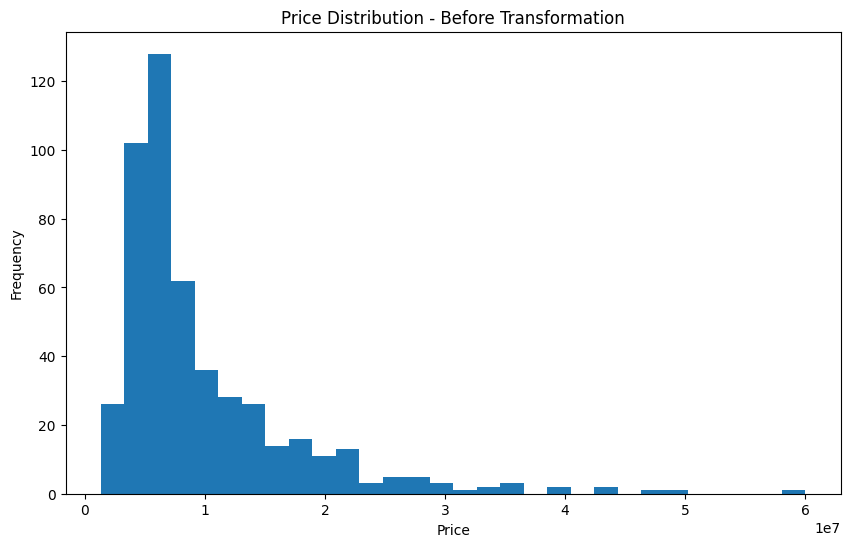

In [211]:
# First, let's look at the distribution of prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['precio'], bins=30)
plt.title('Price Distribution - Before Transformation')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

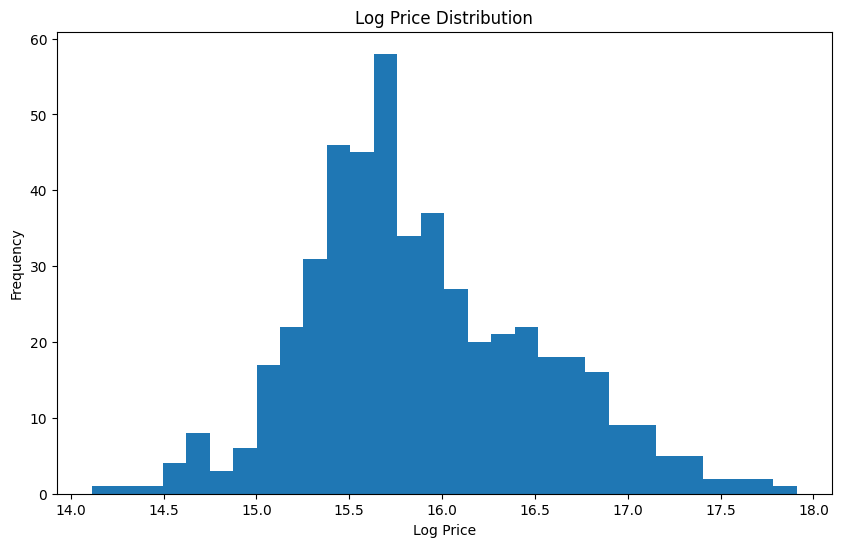

In [212]:
# Apply log transformation to price
# A log transformation compresses large values and spreads out smaller ones, 
# creating a more symmetrically distributed dataset that aligns better with linear regression assumptions

# If the dataset contains values across different scales (e.g. price vs. square meters), logs help normalize these differences,
# making model coefficients more stable and reducing the impact of outliers
df['log_precio'] = np.log1p(df['precio'])

plt.figure(figsize=(10, 6))
plt.hist(df['log_precio'], bins=30)
plt.title('Log Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()

In [213]:
# Identificar todas las columnas dummy de alcaldías
alcaldia_columns = [col for col in df.columns if col.startswith('alcaldia_')]

X = df[['recamaras', 'banos', 'estacionamientos', 'dimensiones'] + alcaldia_columns]
y = df['log_precio']

In [220]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [221]:
X_train.shape

(392, 17)

In [222]:
y_train.shape

(392,)

In [223]:
X_test.shape

(99, 17)

In [224]:
y_test.shape

(99,)

In [225]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [227]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7690006537409466
0.792445970114667


In [ ]:
# Estos son los datos de la casa que quieres predecir
datos_departamento = {
    'recamaras': 3,
    'banos': 2,
    'estacionamientos': 1,
    'dimensiones': 70
}

alcaldias = [
    'alcaldia_Azcapotzalco',
    'alcaldia_Benito Juárez',
    'alcaldia_Coyoacán',
    'alcaldia_Cuajimalpa de Morelos',
    'alcaldia_Cuauhtémoc',
    'alcaldia_Gustavo A. Madero',
    'alcaldia_Iztacalco',
    'alcaldia_Iztapalapa',
    'alcaldia_La Magdalena Contreras',
    'alcaldia_Miguel Hidalgo',
    'alcaldia_Tlalpan',
    'alcaldia_Tláhuac',
    'alcaldia_Venustiano Carranza',
    'alcaldia_Xochimilco',
    'alcaldia_Álvaro Obregón'
]

# Ahora creas un diccionario con las columnas dummy de alcaldía en 0
for alcaldia in alcaldias:
    datos_departamento[alcaldia] = 0

# Y activas la alcaldía correcta
datos_departamento['alcaldia_Tlalpan'] = 1

# Conviertes a DataFrame
df_departamento = pd.DataFrame([datos_departamento])

# Aseguras que el orden de columnas es el mismo que X
df_departamento = df_departamento[X.columns]

# Ahora predices
prediccion_log_precio = model.predict(df_departamento)

# Si quieres obtener el precio en lugar del logaritmo
precio_estimado = np.exp(prediccion_log_precio)[0]

print(f'${precio_estimado:,.0f}')

$4,868,073
